In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special 
import time
%matplotlib inline

In [2]:
# a)
def estimate_pi(N = 1000):
    x_y = np.random.random([int(N), 2]) * 2. - 1.
    r = x_y[:, 0]**2 + x_y[:, 1]**2
    inside = np.sum(r < 1.)
    estimate = inside / N * 4.
    return estimate

In [3]:
for i in range(5):
    print(estimate_pi(100))

3.16
3.16
3.2
3.12
3.04


In [4]:
# b)
def estimate_var(N, Nbin=100):
    pis = [estimate_pi(N) for i in range(Nbin)]
    return np.var(pis)

In [5]:
Ns = np.logspace(1, 5, num=5, dtype=int)
var_N = []

for N in Ns:
    var = estimate_var(N)
    print(f'N={N:<7} var={var:.5f}')
    var_N.append(var) 

N=10      var=0.26106
N=100     var=0.02672
N=1000    var=0.00328
N=10000   var=0.00031
N=100000  var=0.00003


In [6]:
Ns = np.logspace(1, 5, num=20, dtype=int)
var_N = [estimate_var(N) for N in Ns]

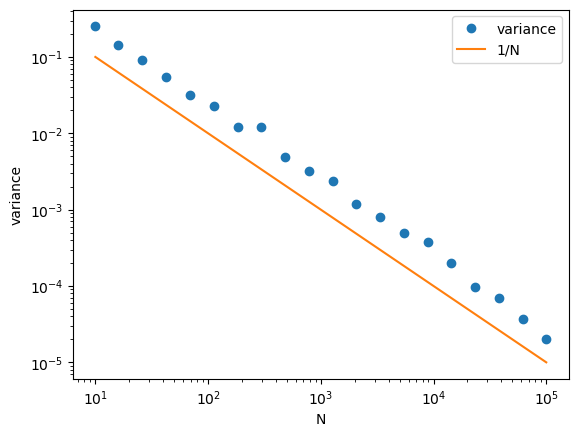

In [7]:
plt.figure()
plt.plot(Ns, var_N, 'o', label='variance')
plt.xscale('log')
plt.yscale('log')
plt.plot(Ns, 1./Ns, label='1/N')
plt.xlabel('N')
plt.ylabel('variance')
plt.legend(loc='best')
plt.show()

The variance decreases proportional to $VAR=\frac{1}{N}$, i.e. the error goes is $\sqrt{VAR} \propto \frac{1}{\sqrt{N}}$.

In [8]:
# d)  Estimating volumne of d-dim sphere
def v_sphere_exact(r,dim):
    """See: https://en.wikipedia.org/wiki/Volume_of_an_n-ball"""
    return np.power(np.pi,dim/2) / (scipy.special.gamma(dim/2 + 1)) * np.power(r, dim)

Similar to the estimate_pi function, we now define an estimate_sphere function

In [9]:
def estimate_sphere(dim=2, N=1000):
    N = int(N)
    sample = np.random.rand(N, dim)
    sample_norm = np.sum(sample ** 2, axis=1)
    return np.sum(sample_norm < 1.) * (2**dim) / N

In [10]:
R = 1.
D_MAX = 12
N = int(1e+6)

In [11]:
dims = np.arange(2,D_MAX+1)
vs = []
times = []
vs_exact = v_sphere_exact(R,dims)
for i,dim in enumerate(dims):
    tic = time.time()
    v = estimate_sphere(dim, N)
    vs.append(v)
    toc = time.time()
    times.append(toc-tic)
    print('dim: ', dim,'volume: ', v, ' %error: ', (np.abs(v-vs_exact[i])*100/vs_exact[i]))   
    print('    --> ellapsed time ', times[-1])

dim:  2 volume:  3.141444  %error:  0.004731790724788949
    --> ellapsed time  0.027688264846801758
dim:  3 volume:  4.18836  %error:  0.010270382744390677
    --> ellapsed time  0.03656315803527832
dim:  4 volume:  4.938192  %error:  0.06869169862465348
    --> ellapsed time  0.04248356819152832
dim:  5 volume:  5.248672  %error:  0.2871888268006863
    --> ellapsed time  0.05078697204589844
dim:  6 volume:  5.175488  %error:  0.15045766436646066
    --> ellapsed time  0.058473825454711914
dim:  7 volume:  4.752  %error:  0.5764101299326131
    --> ellapsed time  0.06591391563415527
dim:  8 volume:  4.061952  %error:  0.0798251633109173
    --> ellapsed time  0.07309389114379883
dim:  9 volume:  3.268608  %error:  0.9064975605759373
    --> ellapsed time  0.08084297180175781
dim:  10 volume:  2.456576  %error:  3.669883129629821
    --> ellapsed time  0.08912110328674316
dim:  11 volume:  1.837056  %error:  2.49709582919253
    --> ellapsed time  0.09660053253173828
dim:  12 volume: 

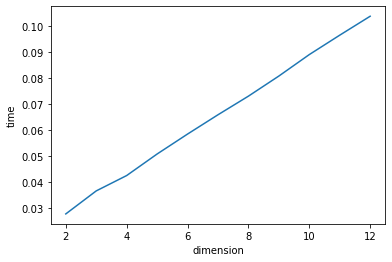

In [12]:
plt.figure()
plt.plot(dims, times)
plt.xlabel('dimension')
plt.ylabel('time')
plt.show()

# Remarks:
1. The runtime increases approximatly linear (i.e. not much) upon increasing the dimesion.
2. The scaling for error is the same in all dimension, i.e. $VAR(\epsilon) \sim 1/N$. (see below)
3. In higher dimension, more and more points are outside the sphere.  With fixed N and growing dimension, our sampling becomes less efficient in the sense that variance is increased. To improve, see the next exercise about importance sampling.

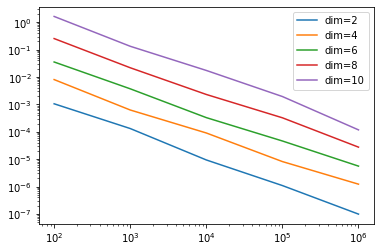

In [13]:
# Scaling of the error with dim and N:
for dim in [2, 4, 6, 8, 10]:
    var_list = []
    N_list = [1e2, 1e3, 1e4, 1e5, 1e6]
    
    for N in N_list:
        N_bins = 100
        err_array = np.zeros(N_bins)

        for idx in range(N_bins):
            vol = v_sphere_exact(1, dim=dim)
            vol_MC = estimate_sphere(dim=dim, N=N)
            err = np.abs(vol - vol_MC) / np.abs(vol)
            err_array[idx] = err
            
        var_list.append(np.var(err_array))
    
    plt.loglog(N_list, var_list, label='dim=%d' % dim)
    
plt.legend()
plt.show()